### Imports

In [1]:
import numpy as _np
import matplotlib.pyplot as _plt
import sys
import os

# Add the parent folder to sys.path
parent_folder = os.path.abspath('..')
if parent_folder not in sys.path:
    sys.path.append(parent_folder)

# Import the module from the parent folder
import ComptonAtIP

### Date and prefix

In [2]:
date = "2025_01_22"
save_name_prefix = "plots/Compton/" + date + "_Compton_plot"

In [13]:
E0 = 14e9
Elab = 6e18
alpha = _np.pi - 0.296706
Erest = ComptonAtIP.convertEnergyLab2Rest(Elab, E0, alpha)

print(ComptonAtIP.differentialCrossSec(E0, 0))
print(ComptonAtIP.differentialCrossSec(Erest, 0))
Erest == ComptonAtIP.scatteredEnergy(Erest, 0)
#ComptonAtIP.acceptReject(Erest)

7.940788916465347e-24
7.940788916465347e-24


True

### Get bunch pattern

In [3]:
#file1 = '../../04_dataLocal/00_++-T20-FF-LUXEDET1_tracking-compton-jitter_10000-part.root'
#df_bp1 = ComptonAtIP.getBDSIMdataInDF(file)

In [4]:
#file2 = '../../04_dataLocal/00_++-+++-FF-LUXEDET1_tracking-compton-jitter_10000-part.root'
#df_bp2 = ComptonAtIP.getBDSIMdataInDF(file2)

In [5]:
file3 = '../../04_dataLocal/01_++-+++-FF-LUXEDET1_tracking-compton-jitter_10000-part.root'
df_bp3 = ComptonAtIP.getBDSIMdataInDF(file3)

BDSIM output file - using DataLoader


ValueError: Length of values (2340987) does not match length of index (74911584)

In [5]:
df = df_bp2.loc[df_bp2.index.get_level_values('BPM') != "IP"]

In [17]:
import pybdsim as _bd
data = _bd.Data.Load("../../03_bdsimModel/output.root")
e = data.GetEvent()
et = data.GetEventTree()
nbentires = et.GetEntries()
sampler_names = e.GetSamplerNames()
nbbpm = len(sampler_names)
for evt in et:
    if len(evt.PrimaryFirstHit.weight) != 0:
        pass
track_data = _bd.Data.TrajectoryData(data, 0)
track_table = track_data.trajectories

def printTrajLog(track_table):
    tracknb = 0
    for i, track in enumerate(track_table):
        postPT = track["postPT"]
        for process in postPT:
            if process == -1:
                tracknb = i
    for [PT, PST, S] in zip(track_table[tracknb]["postPT"], track_table[tracknb]["postPST"], track_table[tracknb]["S"]):
        if PT not in [1., 10.]:
            # print(PT, " ", PST, " ", S)
            pass
    for track in track_table:
        for i in track["S"]:
            if i != 0:
                print(i)
    print("Fin")
printTrajLog(track_table)
evt.Trajectory.S.size()

BDSIM output file - using DataLoader
Fin


4030

In [11]:
df = df_bp3.loc[df_bp3.index.get_level_values('BPM') != "IP"]
df

partID         X            PX         Y            PY  \
BPM   Particle                                                           
D1000 0             11 -0.000007 -3.902036e-07  0.000045  2.055798e-06   
      1             11 -0.000016 -1.358982e-06 -0.000087 -3.949568e-06   
      2             11  0.000029  3.895048e-06 -0.000028 -2.511257e-06   
      3             11  0.000013  1.479026e-06  0.000032  2.019106e-06   
      4             11  0.000012 -2.491311e-07  0.000008  5.953781e-08   
...                ...       ...           ...       ...           ...   
DET1  9995          14  1.386358  1.400945e-01 -1.500798 -1.912819e-01   
      9996          22 -0.041089 -6.509688e-03 -0.028741 -2.959517e-03   
      9997          11 -0.274635 -6.933194e-02  0.000331  1.634243e-04   
      9998          22  1.061818  1.650424e-01 -2.138316 -3.007061e-01   
      9999          11 -0.176192 -3.993608e-02  0.000196  8.731998e-05   

                        S          E  
BPM   Particle                        
D1000 0          1.000000  14.000004  
      1          1.000000  14.000001  
      2          1.000000  13.999990  
      3          1.000000  14.000016  
      4          1.000000  13.999974  
...                   ...        ...  
DET1  9995      25.960047   0.029792  
      9996      25.960047   0.045780  
      9997      25.960047   7.442100  
      9998      25.960047   0.004410  
      9999      25.960047  13.455426  

[310000 rows x 7 columns]

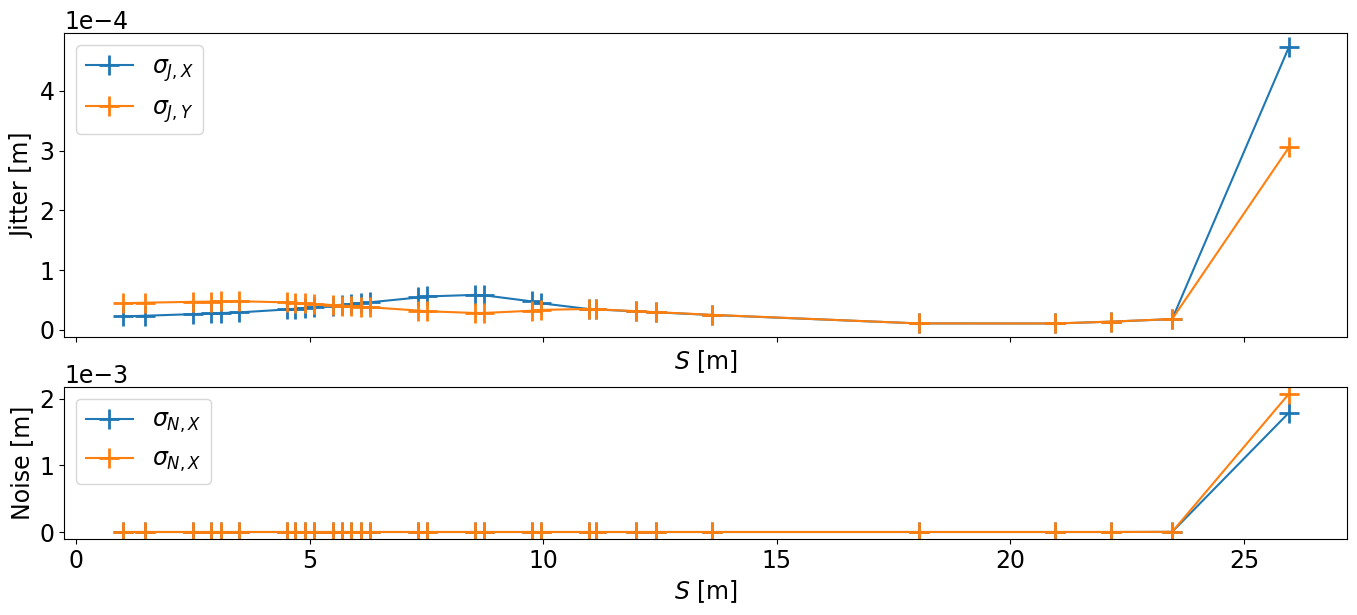

In [6]:
ComptonAtIP.plotJitterAndNoise(df, plotNoise=True, figsize=[14, 6], height_ratios=[2,1])

In [7]:
df_bp2.loc[df_bp2.index.get_level_values('BPM') == "IPCH"]

X            PX             Y            PY          S  \
BPM  Particle                                                                  
IPCH 0         0.000007  6.860686e-07  8.362623e-06  1.975910e-06  20.960047   
     1        -0.000003  2.015950e-06  2.343014e-05  7.146142e-06  20.960047   
     2         0.000002 -6.737329e-06  4.271887e-06 -1.696942e-06  20.960047   
     3         0.000013 -1.350620e-06 -8.992661e-06 -1.050970e-06  20.960047   
     4         0.000015  5.840438e-06  5.315220e-06  3.334567e-06  20.960047   
...                 ...           ...           ...           ...        ...   
     9995     -0.000005 -1.107598e-06  8.493378e-06  1.955118e-06  20.960047   
     9996      0.000001 -1.705439e-08 -3.238888e-06  1.026836e-06  20.960047   
     9997      0.000019 -3.615830e-06 -1.735567e-05  5.747819e-08  20.960047   
     9998     -0.000012 -6.371699e-07  4.330791e-07 -2.404860e-06  20.960047   
     9999      0.000013 -7.929871e-07  7.574570e-06  3.512727e-06  20.960047   

                       E  
BPM  Particle             
IPCH 0         14.000014  
     1         13.999988  
     2         14.000002  
     3         13.999989  
     4         14.000000  
...                  ...  
     9995      13.999995  
     9996      13.999998  
     9997      14.000004  
     9998      14.000002  
     9999      13.999995  

[10000 rows x 6 columns]

Calulate chi2 for 31 bpms : |██████████████████████████████████████████████████| 100.0% Complete


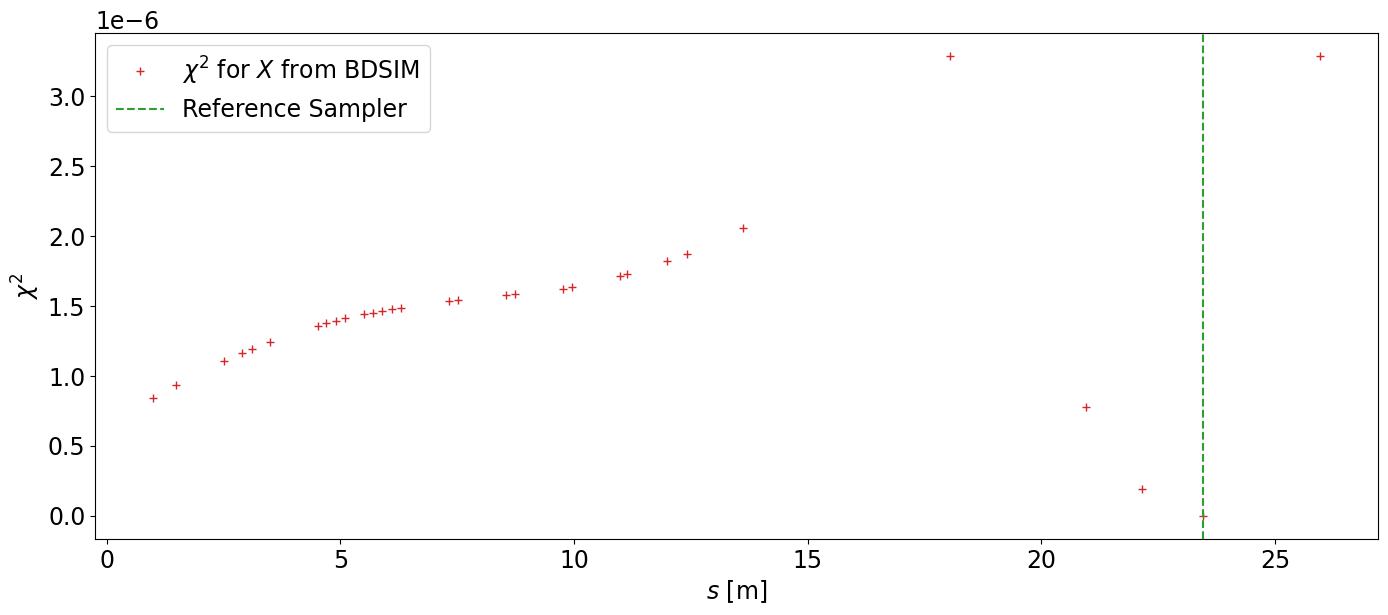

In [8]:
ComptonAtIP.PlotTheoryFitAndChi2(df, 'X', "EXT1", 'X')

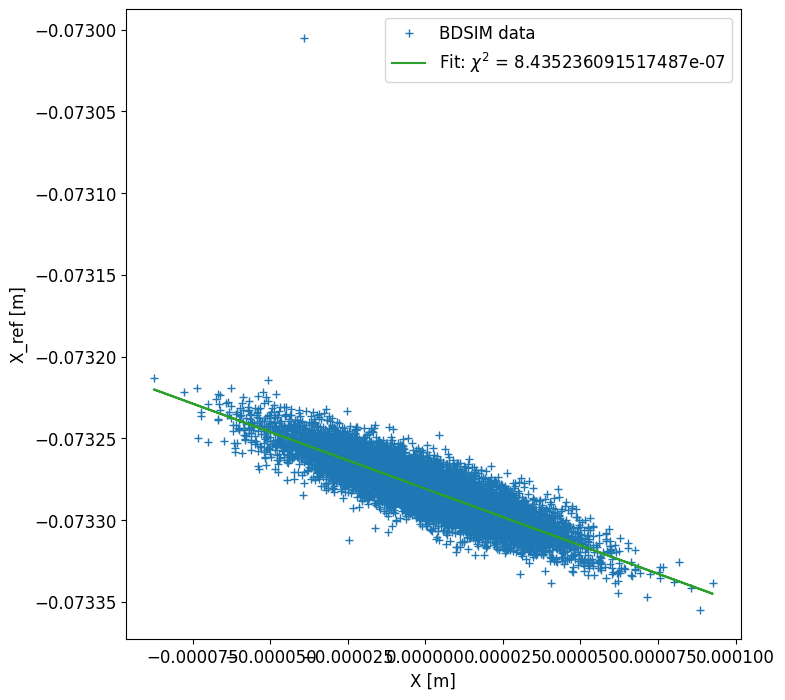

In [9]:
ComptonAtIP.PlotCorrelation(df, "D1000", "X", "EXT1", "X", figsize=[7, 7])

In [10]:
df.index.get_level_values('BPM').unique()

Index(['D1000', 'D048545', 'QH11T20', 'D038545', 'CHXT20', 'D038545_1',
       'QH12T20', 'D018545', 'CHYT20', 'D0200', 'D03982L', 'CHXT20_1',
       'D0200_1', 'CHYT20_1', 'D0200_2', 'QH13T20', 'D01918', 'QH14T20',
       'D01918_1', 'QH14T20_1', 'D01918_2', 'QH15T20', 'D01500', 'D08500',
       'ICSC', 'M001', 'DUM1', 'IPCH', 'M002', 'EXT1', 'DET1'],
      dtype='object', name='BPM')

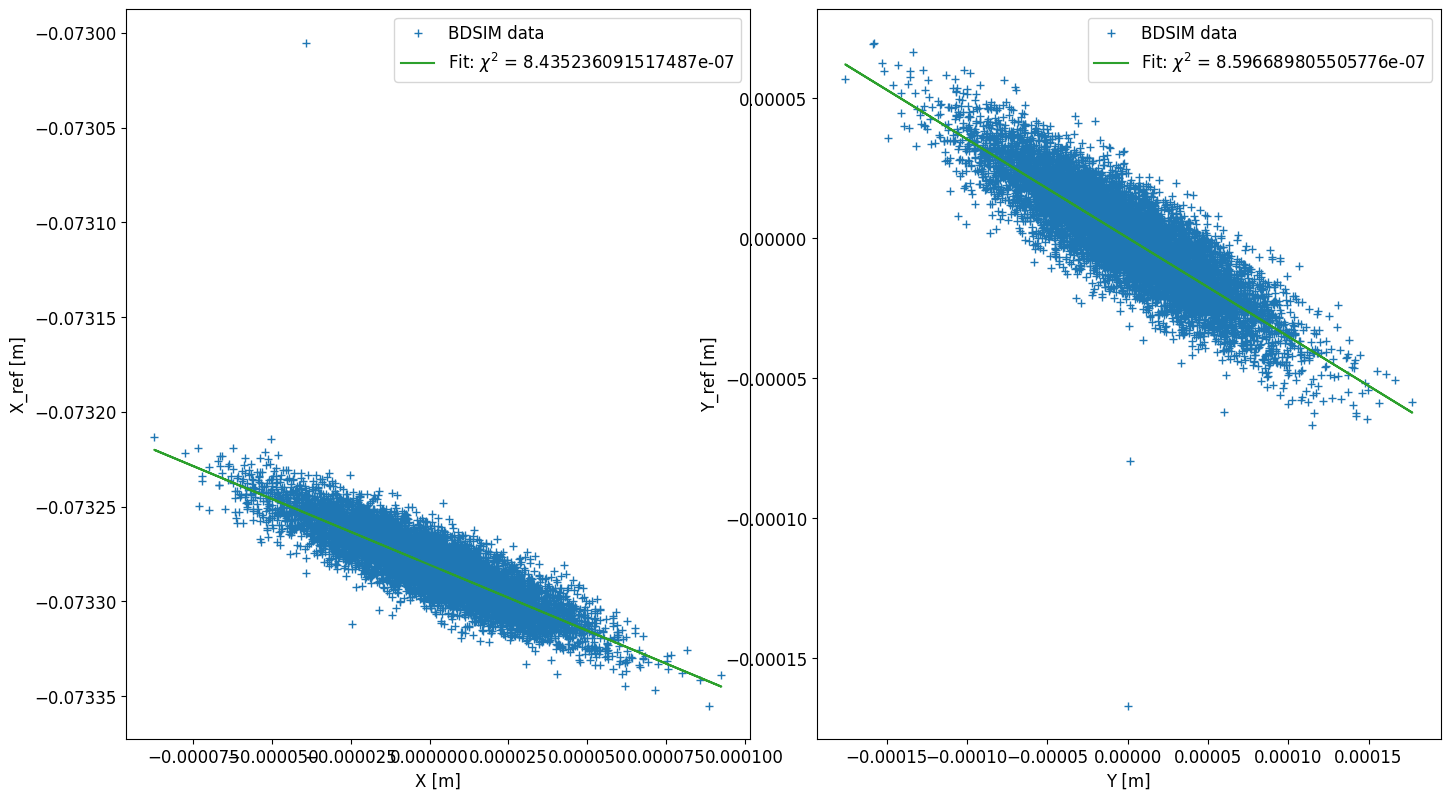

In [11]:
ComptonAtIP.PlotAllCorrelation(df, "D1000", "EXT1")